<a href="https://colab.research.google.com/github/shuklahrs/Machine-Learning/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUPPORT VECTOR REGRESSION

#Importing Libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing Datasets

In [60]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[ : , 1 :-1].values
y = dataset.iloc[ : , -1].values

In [62]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [63]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [64]:
y = y.reshape(len(y), 1)

In [65]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


#Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [67]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [68]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#Training the SVR model on the whole Dataset

In [69]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')     #rbf = Gaussian Radial Basis Function(RBF)
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#Predicting a new Result

In [70]:
print(sc_y.inverse_transform(regressor.predict(sc_x.transform([[8.9]]))))

[252789.13920842]


#Visualising the SVR results

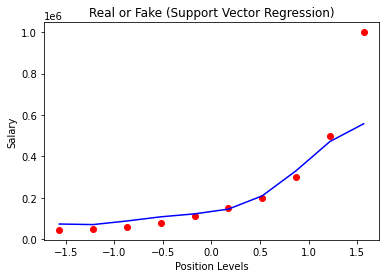

In [71]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Real or Fake (Support Vector Regression)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

#Visualising the SVR results (foe higher resolution and smoother curve)

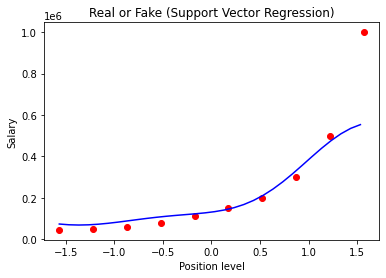

In [75]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.inverse_transform(x_grid))), color = 'blue')
plt.title('Real or Fake (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()